<a href="https://colab.research.google.com/github/Abhishek-Verma7887/Face-recognition/blob/master/Latest_object_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
!unzip "./drive/My Drive/objectDD.zip"

Archive:  ./drive/My Drive/objectDD.zip
replace laptop/.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
!unzip "./drive/My Drive/car.zip"

Archive:  ./drive/My Drive/car.zip
   creating: car/
  inflating: car/-1x-1.jpg           
  inflating: car/-1x-11.jpg          
  inflating: car/1131247751-1536x1536.jpg  
  inflating: car/1451939922-2731.jpg  
  inflating: car/1546177287_gpwmiH_header2019.jpg  
  inflating: car/1582827856-1832.jpg  
  inflating: car/1592295762_hyundai-creta-7-seater.png  
  inflating: car/16352959_303.jpg    
  inflating: car/191126145531-gurgaon-india-traffic-congestion-exlarge-169.jpg  
  inflating: car/35-big.jpg          
  inflating: car/40677.jpg           
  inflating: car/46346679_1433126363490936_8832158335038914560_o-e1565778146625-1024x542.jpg  
  inflating: car/5-factors-to-consider-while-buying-a-new-car-in-india.jpg  
  inflating: car/80750857.jpg        
  inflating: car/81571619.jpg        
  inflating: car/920726-bus-service-new.jpg  
  inflating: car/Best-Cars-for-Indian-Roads.jpg  
  inflating: car/bharat-Bandh-1.jpg  
  inflating: car/blinkeyelabs_featured.jpg  
  inflating: car/b

In [ ]:
!unzip "./drive/My Drive/swimming1.zip"

Archive:  ./drive/My Drive/swimming1.zip
   creating: swimming1/
  inflating: swimming1/07-05-2021-1.jpg  
  inflating: swimming1/122467334.jpg  
  inflating: swimming1/122467449.jpg  
  inflating: swimming1/220px-DM_Freiwasserschwimmen_2009_Lindau.JPG.jpg  
  inflating: swimming1/220px-Tyler_Clary_28770735094629_28cropped29.jpg  
  inflating: swimming1/41R1yFcUZ-L.jpg  
  inflating: swimming1/51O8ihX2BgzL.jpg  
  inflating: swimming1/51XIvmDkvdL._SY355_.jpg  
  inflating: swimming1/51Z08QTCd2L._SX425_.jpg  
  inflating: swimming1/612BeLxRy9hL._SX355_.jpg  
  inflating: swimming1/617SaSa5j0L._SX425_.jpg  
  inflating: swimming1/674549509-H.webp  
  inflating: swimming1/71A6r6l5pLL._SL1500_.jpg  
  inflating: swimming1/71GTLQKylEL.jpg  
  inflating: swimming1/71N6VjIy5tL._AC._SR360460.jpg  
  inflating: swimming1/81cO74Q1L1L.jpg  
  inflating: swimming1/81ef8186bfce2254c7f06592f453e179.jpg  
  inflating: swimming1/81u-zZDo-HL.jpg  
  inflating: swimming1/82300ca1eec9522a6c5df5556d889800

In [2]:
import os
from os.path import join
import pandas as pd
rows=[]
for filename in os.listdir(join('./', 'hotel')):
  rows.append([filename,'hotel'])
for filename in os.listdir(join('./', 'laptop')):
  rows.append([filename,'laptop'])
for filename in os.listdir(join('./', 'mobiles')):
  rows.append([filename,'mobiles'])
for filename in os.listdir(join('./', 'swimming')):
  rows.append([filename,'swimming'])
for filename in os.listdir(join('./', 'car')):
  rows.append([filename,'car'])
df = pd.DataFrame(rows, columns=["filename", "category"])
df.head(-10)

,filename,category
0,images153.jpg,hotel
1,Property-619ba267b96fb74ddc1f54dd0037dc60-7548...,hotel
2,images199.jpg,hotel
3,images292.jpg,hotel
4,images221.jpg,hotel
...,...,...
2312,images106.jpg,car
2313,images69.jpg,car
2314,images78.jpg,car
2315,images192.jpg,car


In [3]:
df["values"]= df["category"]

df.loc[df.category == "hotel", 'values'] = 0
df.loc[df.category == "laptop", 'values'] = 1
df.loc[df.category == "mobiles", 'values'] = 2
df.loc[df.category == "swimming", 'values'] = 3
df.loc[df.category == "car", 'values'] = 4
df.head(-10)

,filename,category,values
0,images153.jpg,hotel,0
1,Property-619ba267b96fb74ddc1f54dd0037dc60-7548...,hotel,0
2,images199.jpg,hotel,0
3,images292.jpg,hotel,0
4,images221.jpg,hotel,0
...,...,...,...
2312,images106.jpg,car,4
2313,images69.jpg,car,4
2314,images78.jpg,car,4
2315,images192.jpg,car,4


In [4]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator()

In [5]:
import keras
from keras.models import Model, Sequential
from keras.layers import Flatten, Dense, Activation,Dropout
from keras.layers import Convolution2D, MaxPooling2D, LeakyReLU
from keras import backend as K
%pylab inline
from matplotlib import pyplot as plt
import numpy as np
import cv2
import os
from copy import copy
from collections import Counter
import os
from os.path import join
import pandas as pd
from skimage.io import imread

Populating the interactive namespace from numpy and matplotlib


In [6]:


import os
from os.path import join
import pandas as pd
from skimage.io import imread
from skimage.color import gray2rgb
new_list_2= []
y_2= []
 
def addin_list(a,value):
  for filename in os.listdir(join( './', a)):
      try:
          img = imread(join('./', a, filename))
          if len(img.shape) == 2:
              img = gray2rgb(img)
          img = cv2.resize(img,(224,224))
          #print(img.shape)
          if img.shape==(224,224,3):   
              new_list_2.append(img)
              y_2.append(value)
          else:
              print(filename)
      except:
          pass

addin_list('hotel',0)
addin_list('laptop',1)
addin_list('mobiles',2)
addin_list('swimming',3)
addin_list('car',4)


Untitled-design-2-1.png
e6330-core-i5-3rd-gen-dell-used-laptop-500x500.jpg
laptop_banner-01.png
-handheld-devices-mobile-phones-android-female-hands-gadget-electronics-hand.png
02119ea526b8f0fc96ddf67ecabf45ac.png
39dc7448df1c875d16db433add3604b4.png
asus-zenfone-5z-first-impression-hands-review-india-launch-price-specs.png
1608704571.png
Oppo-A52-376x800-1587709667.png
nokia-3_4-fjord-front_back-int.png
exchange_offer_banner.png
6da8203a120430b737f67f888eadb6d0.png
Pardeep.png


In [7]:
len(new_list_2)

2312

In [8]:
new_list_2= np.asarray(new_list_2)

In [9]:
new_list_2.shape

(2312, 224, 224, 3)

In [10]:
y_2= np.asarray(y_2)

In [11]:
y_2.shape

(2312,)

In [ ]:
!unzip "./drive/My Drive/validation.zip"

Archive:  ./drive/My Drive/validation.zip
   creating: laptop1/
  inflating: laptop1/00xp-virus-wfh1-mobileMasterAt3x.jpg  
  inflating: laptop1/01b-Mark.jpg.optimal.jpg  
  inflating: laptop1/0fc0b284fe642fd1ae708de255142c0c.jpg  
  inflating: laptop1/10-essential-computer-maintenance-tips-hero156657824639785.jpg  
  inflating: laptop1/1013258-cnxn-laptop-buying-guide-menu-flyout.jpg  
  inflating: laptop1/1200px-thumbnail.jpg  
  inflating: laptop1/14mag-remote-02-superJumbo.jpg  
  inflating: laptop1/1cg98UiAWieLn_CL47_mb4g.jpeg  
  inflating: laptop1/22TcBxDokgJPuf2ewRPBKn-1200-80.jpg  
  inflating: laptop1/290px-Acer_Chromebook_11_282439483416129.jpg  
  inflating: laptop1/3.jpg           
  inflating: laptop1/414MHIwz70L._SR6002C315_PIWhiteStrip2CBottomLeft2C02C35_SCLZZZZZZZ_FMpng_BG2552C2552C255.jpg  
  inflating: laptop1/41i2eMaS1oL.jpg  
  inflating: laptop1/428E2E982C76B0BF5EBA4D9F2BF1EDB1.jpg  
  inflating: laptop1/43ba955425e7cb6036d3b490e3dffc03.jpg  
  inflating: laptop1/

In [12]:
test_x= []
test_y= []
 
def addin_list2(a,value):
  for filename in os.listdir(join( './', a)):
      try:
          img = imread(join('./', a, filename))
          if len(img.shape) == 2:
              img = gray2rgb(img)
          img = cv2.resize(img,(224,224))
          #print(img.shape)
          if img.shape==(224,224,3):   
              test_x.append(img)
              test_y.append(value)
          else:
              print(filename)
      except:
          pass

addin_list2('hotel1',0)
addin_list2('laptop1',1)
addin_list2('mobiles1',2)
addin_list2('swimming1',3)
addin_list2('car1',4)

penguin_logo_new.png
Table1.png
Screen-Shot-2019-05-27-at-9.05.26-am.png
f3ec7a6548cdbc8f10a17e6f904aed7b.png
product-image.fill.size_1200x675.png
Screen-Shot-2019-05-26-at-9.58.30-pm.png
4k-wallpapers-desktop-best-sites-featured-image.png
product-image1.fill.size_1200x1200.png
product-image.fill.size_1200x1200.png
Screen-Shot-2019-05-26-at-10.01.05-pm.png
CoverImage.png
f2f08e562fe93f9224437ccd15e1ffce.png
e-smartphone-vivo-random-access-memory-camera-electronics-gadget-camera-lens.png
cell-phones.png
affordable-swimming-pool-tiles-500x500.png
tenor.gif
16623_DelhiGurgaon_highway_edit.gif.png
DelhiGurgaon_highway_edit.gif.png


In [13]:
len(test_x)

904

In [14]:
test_x=np.asarray(test_x)

In [15]:
test_x.shape

(904, 224, 224, 3)

In [16]:
test_y=np.asarray(test_y)

In [17]:
test_y.shape

(904,)

In [18]:
#datagen.fit(new_list_2)
Real_train= datagen.flow(new_list_2,y_2,batch_size=32)


In [19]:
import tensorflow as tf
 
model1 = Sequential([
  T_feature,
  Dense(2048),
  Dense(1024),
  Dense(512),
  Dense(256),
  Dense(64),
  Dense(32),
  Dense(5)
])
model1.add(Activation("softmax"))
model1.build([None, 224,224, 3])

In [20]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
module_wrapper (ModuleWrappe (None, 2048)              23500352  
_________________________________________________________________
dense (Dense)                (None, 2048)              4196352   
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dense_2 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_3 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_4 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_5 (Dense)              (None, 32)                2

In [21]:
model1.compile(
  optimizer="Adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(),
  metrics=['accuracy'])
 
EPOCHS = 10

In [23]:

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10,restore_best_weights=True ) 
history = model1.fit(                  
                    Real_train,
                    batch_size=32,
                    epochs=10,
                    callbacks=[callback],
                    shuffle=True,
                     validation_data=(test_x,test_y))

Epoch 1/10
73/73 [==============================] - 20s 274ms/step - loss: 0.2219 - accuracy: 0.9606 - val_loss: 1.6776 - val_accuracy: 0.8473
Epoch 2/10
73/73 [==============================] - 20s 279ms/step - loss: 0.1783 - accuracy: 0.9723 - val_loss: 2.9088 - val_accuracy: 0.7843
Epoch 3/10
73/73 [==============================] - 20s 274ms/step - loss: 0.1647 - accuracy: 0.9658 - val_loss: 3.0774 - val_accuracy: 0.7931
Epoch 4/10
73/73 [==============================] - 20s 272ms/step - loss: 0.3385 - accuracy: 0.9533 - val_loss: 6.7769 - val_accuracy: 0.6991
Epoch 5/10
73/73 [==============================] - 25s 340ms/step - loss: 0.4676 - accuracy: 0.9472 - val_loss: 2.8290 - val_accuracy: 0.8330
Epoch 6/10
73/73 [==============================] - 25s 341ms/step - loss: 0.4219 - accuracy: 0.9559 - val_loss: 3.1202 - val_accuracy: 0.8208
Epoch 7/10
73/73 [==============================] - 20s 275ms/step - loss: 0.2991 - accuracy: 0.9654 - val_loss: 3.1147 - val_accuracy: 0.8285

In [1]:
import tensorflow_hub as hub

T_feature = hub.KerasLayer("https://tfhub.dev/google/experts/bit/r50x1/in21k/object/1",    trainable=False)

In [ ]:
T_feature.trainable=False

In [24]:
!mkdir -p saved_model
model1.save('./drive/My Drive/saved_model/my_latest_model')

INFO:tensorflow:Assets written to: ./drive/My Drive/saved_model/my_latest_model/assets


INFO:tensorflow:Assets written to: ./drive/My Drive/saved_model/my_latest_model/assets


# New Section

In [ ]:
cp ./saved_model ./drive/\My\Drive/

cp: cannot stat './saved_model': No such file or directory


In [25]:
dic={}
dic[0]='hotel'
dic[1]='laptop'
dic[2]='mobiles'
dic[3]='swimming'
dic[4]='car'

In [26]:
model = keras.models.load_model('./drive/My Drive/saved_model/my_latest_model')

(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)


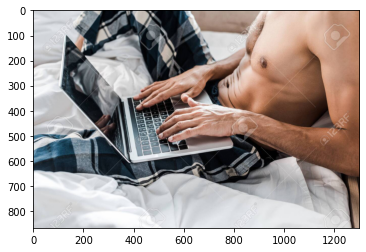

In [27]:
valid_x=[]
valid_y=[]
rows1=[]
def preprocess(a):
  for filename in os.listdir(join( './', a)):
    img = imread(join('./', a, filename))
    plt.imshow(img)
    if len(img.shape) == 2:
        img = gray2rgb(img)
    img = cv2.resize(img,(224,224))
    print(img.shape)
    if img.shape==(224,224,3):   
        valid_x.append(img)
        rows1.append([filename,"0"])

preprocess('preprocess')
df2=pd.DataFrame(rows1,columns=["filename","values"])
df2.head()
valid_x=np.asarray(valid_x)
valid_y=np.asarray(valid_y)

In [28]:
valid_y=model1.predict(valid_x)

In [29]:
valid_y

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.]], dtype=float32)

In [30]:
valid_y
ravel=[]
for j in valid_y:
  ravel.append(dic[argmax(j)])

df2['new'] = pd.DataFrame({'new':ravel})
df2.head()

,filename,values,new
0,Ford-Mustang-Exterior-126883.jpg,0,car
1,images.jpg,0,swimming
2,download.jpg,0,swimming
3,Bubblesswimmingpool-Lucknow-UP.jpeg,0,swimming
4,136218398-cropped-view-of-sexy-bi-racial-man-u...,0,laptop
